In [148]:
#importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#importing libraties for machiene learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import LabelEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#full displçay of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)



## IMPORTING OUR 'CONSUMER ELETRONIC SALES DATASET'


In [149]:
df = pd.read_csv("/kaggle/input/consumer-electronics-sales-dataset/consumer_electronics_sales_data.csv")

## Check the data set


In [150]:
le = LabelEncoder()
df['ProductCategory'] = le.fit_transform(df['ProductCategory'])
df['ProductBrand'] = le.fit_transform(df['ProductBrand'])

<h2 style="color: #4CAF50;text-align: center;"> Machine Learning Model</h2>

## SPLIT DATA INFO FEATURES AND TARGET

ProductID don´t affect the target variable. So, we can drop it in features selection.

In [151]:
X = df.drop(['ProductID', 'PurchaseIntent'], axis=1)
y = df['PurchaseIntent']

## SPLIT DATA INTO TRAINING AND TEST SETS

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SCALIGN THE DATA

In [153]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MODEL BUILDING

In [154]:
#Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'CatBoost Classifier': CatBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}


#Trainig the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")
    
print("########################################################")


#Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name]= {
        'MSE':mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")
    
#Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best Model: {best_model_name} with R2: {best_model_score:.2f}")


Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
Learning rate set to 0.023934
0:	learn: 0.6610107	total: 3.25ms	remaining: 3.24s
1:	learn: 0.6305307	total: 7.14ms	remaining: 3.56s
2:	learn: 0.6039513	total: 11.1ms	remaining: 3.69s
3:	learn: 0.5774311	total: 14.9ms	remaining: 3.72s
4:	learn: 0.5526912	total: 18.1ms	remaining: 3.6s
5:	learn: 0.5305021	total: 22ms	remaining: 3.65s
6:	learn: 0.5081070	total: 26.8ms	remaining: 3.8s
7:	learn: 0.4878828	total: 30ms	remaining: 3.72s
8:	learn: 0.4689585	total: 33.4ms	remaining: 3.68s
9:	learn: 0.4511295	total: 37.4ms	remaining: 3.71s
10:	learn: 0.4345934	total: 40.4ms	remaining: 3.63s
11:	learn: 0.4191657	total: 43.4ms	remaining: 3.57s
12:	learn: 0.4055207	total: 46.2ms	remaining: 3.51s
13:	learn: 0.3920087	total: 50.1ms	remaining: 3.53s
14:	learn: 0.3791286	total: 53.8ms	remaining: 3.53s
15:	learn: 0.3672279	total: 57.6ms	remaining: 3.54s
16:	learn: 0.3560543	total: 61.6ms	remaining: 3.56s
17

# SAME RESULTS

1. Random Forest MSE: 0.05, R2: 0.81

2. Gradient Boosting MSE: 0.05, R2: 0.81

3. CatBoost Classifier MSE: 0.05, R2: 0.81

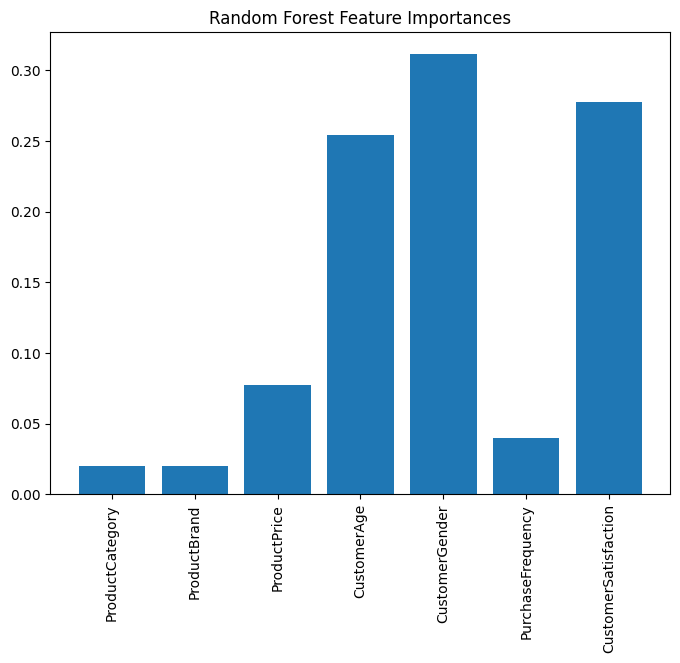

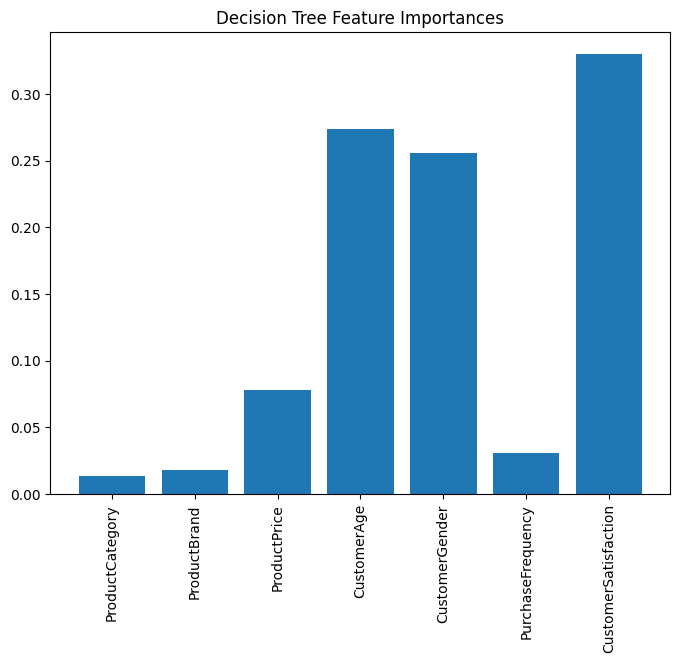

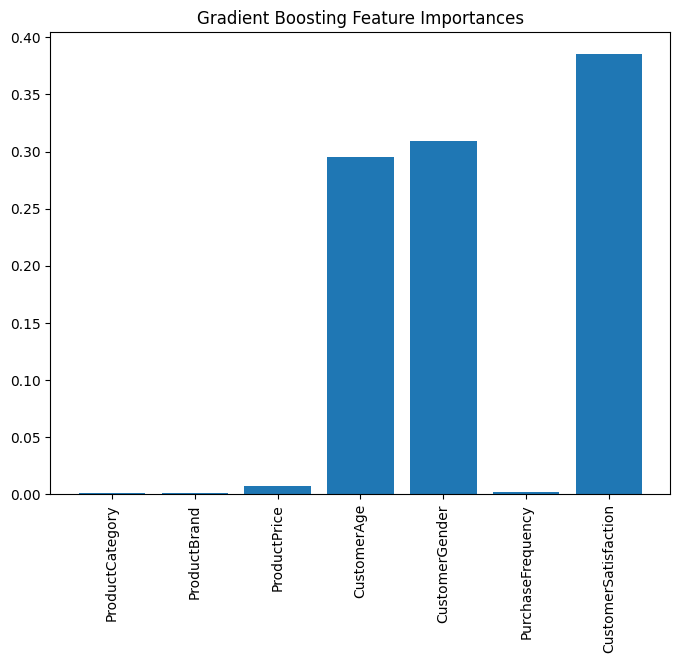

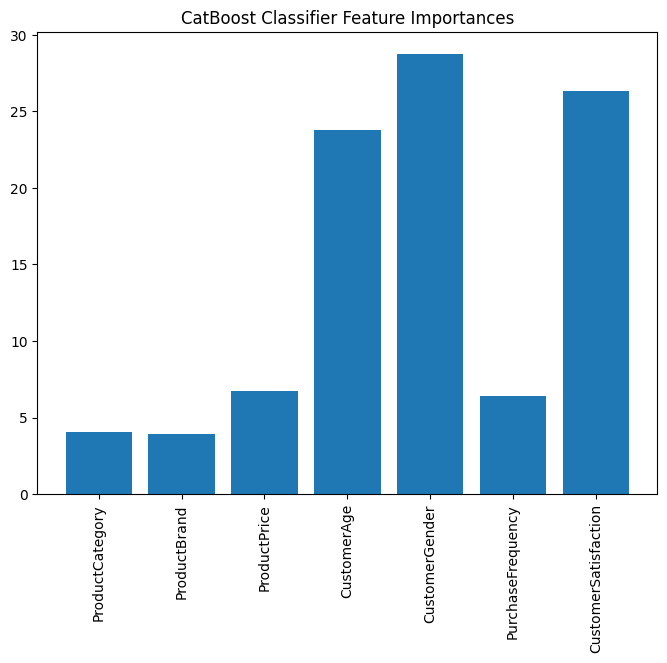

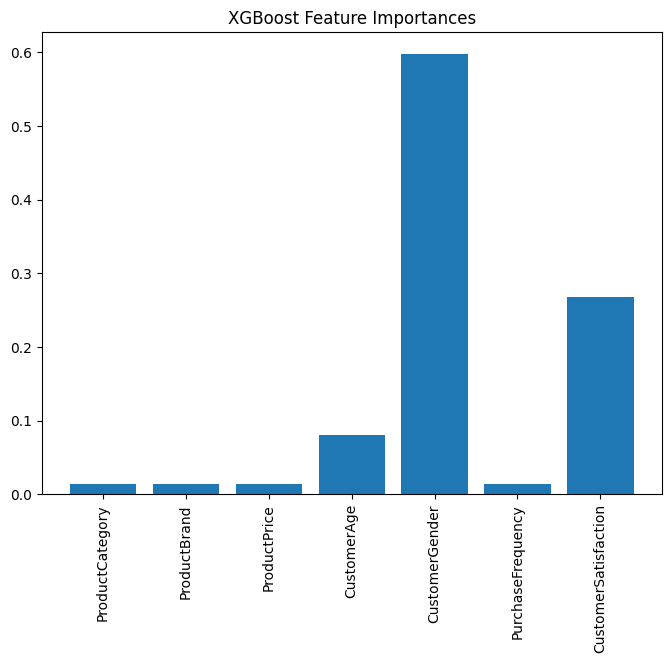

In [155]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize= (8,6))
        plt.bar(range(len(feature_importances)), feature_importances)
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f'{name} Feature Importances')
        plt.show()

## WITH PARAMETERS

In [156]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(max_depth =5, n_estimators=50, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42),
    'CatBoost Classifier': CatBoostClassifier(n_estimators=100, depth=5, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimator=100, random_state=42)
    }

#Training model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("######################################################")

#Models and the evaluate
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f'{name} MSE: {mse:.2f}, R2: {r2:.2f}')
    
#Finde the best model
best_model_name = max(model_scores, key = lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f'Best model: {best_model_name} with R2:{best_model_score:.2f}')
    

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
0:	learn: 0.6159974	total: 1.86ms	remaining: 185ms
1:	learn: 0.5539922	total: 4.02ms	remaining: 197ms
2:	learn: 0.5025690	total: 5.86ms	remaining: 190ms
3:	learn: 0.4586838	total: 7.94ms	remaining: 191ms
4:	learn: 0.4213038	total: 9.89ms	remaining: 188ms
5:	learn: 0.3899633	total: 11.8ms	remaining: 184ms
6:	learn: 0.3625088	total: 13.9ms	remaining: 185ms
7:	learn: 0.3386396	total: 15.8ms	remaining: 182ms
8:	learn: 0.3187079	total: 18.2ms	remaining: 184ms
9:	learn: 0.3008280	total: 19.8ms	remaining: 178ms
10:	learn: 0.2856625	total: 21.7ms	remaining: 175ms
11:	learn: 0.2732338	total: 23.9ms	remaining: 175ms
12:	learn: 0.2617459	total: 26.1ms	remaining: 175ms
13:	learn: 0.2517772	total: 28.1ms	remaining: 173ms
14:	learn: 0.2429919	total: 30.1ms	remaining: 171ms
15:	learn: 0.2356462	total: 32ms	remaining: 168ms
16:	learn: 0.2292605	total: 34ms	remaining: 166ms
17:	learn: 0.2238238	total: 36

## FEATURE ENGINEERING

I will do the feature engineering in to check if it increase the model performing score.


In [157]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,3,2,312.949668,18,0,2,1,0
1,5875,2,3,980.389404,35,1,7,2,1
2,5876,4,3,2606.718293,63,0,1,5,1
3,5877,3,3,870.395450,63,1,10,3,1
4,5878,4,4,1798.955875,57,0,17,3,0


## PRODUCT PRICE BINNING

In [158]:
df['ProductPriceBucket'] = pd.cut(df['ProductPrice'], bins=[100, 500, 1000, 1500, 2000, 3000], labels=['Very low', 'low', 'Medium', 'High', 'Very High'])

In [181]:
plt = px.histogram(df, x='ProductPriceBucket', title='Product Price Distribution', color_discrete_sequence=px.colors.sequential.ice)
plt.show()

## AGE BINNING

In [160]:
df['CustomerAgeGroup'] = pd.qcut(df['CustomerAge'], q=4, labels=['Young', 'Middle-aged', 'Mature', 'Senior'])

In [161]:
plt = px.histogram(df, x='CustomerAgeGroup', title='Customer Age Distribution', color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

## PURCHASE FREQUENCY BINNING

In [162]:
df['PurchaseFrequencyGroup'] = pd.qcut(df['PurchaseFrequency'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [163]:
plt = px.histogram(df, x='PurchaseFrequencyGroup', title='Purchase Frequency Distribution', color_discrete_sequence=px.colors.sequential.thermal_r)
plt.show()

## CUSTOMER SATISFACTION BINING

In [164]:
df['CustomerSatisfactionGroup'] = pd.qcut(df['CustomerSatisfaction'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [165]:
plt = px.histogram(df, x='CustomerSatisfactionGroup', color_discrete_sequence=px.colors.sequential.Sunset)
plt.show()

## Exploring the Relationship between Customer Satisfaction and Purchase Frequency

To better understand the relationship between customer satisfaction and purchase frequency, I decided to create a new interaction feature called CustomerSatisfaction_PurchaseFrequency. This new feature captures the combined effect of a customer's satisfaction level and their purchase frequency.

* Rationale Behind Creating the New Feature

The motivation for creating this interaction feature is to investigate whether there is a significant relationship between customer satisfaction levels and the frequency of their purchases.


* Hypothesis

The hypothesis is that customers with high satisfaction levels tend to make purchases more frequently, while customers with low satisfaction levels might make purchases less frequently. By multiplying the variables CustomerSatisfaction and PurchaseFrequency, it is possible to identify patterns and trends that would not be visible when analyzing these variables in isolation.

In [166]:
df['CustomerSatisfaction_PurchaseFrequency'] = df['CustomerSatisfaction'] * df['PurchaseFrequency']

In [167]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductPriceBucket,CustomerAgeGroup,PurchaseFrequencyGroup,CustomerSatisfactionGroup,CustomerSatisfaction_PurchaseFrequency
0,5874,3,2,312.949668,18,0,2,1,0,Very low,Young,Low,Low,2
1,5875,2,3,980.389404,35,1,7,2,1,low,Middle-aged,Medium,Low,14
2,5876,4,3,2606.718293,63,0,1,5,1,Very High,Senior,Low,Very High,5
3,5877,3,3,870.395450,63,1,10,3,1,low,Senior,Medium,Medium,30
4,5878,4,4,1798.955875,57,0,17,3,0,High,Senior,Very High,Medium,51


In [168]:
plt = px.histogram(df, x = 'CustomerSatisfaction_PurchaseFrequency', title='Customer Satisfaction and Purchase Frequency Distribution',color_discrete_sequence=px.colors.sequential.Sunsetdark)
plt.show()

## LABEL ENCONDING FOR NEW FEATURES

In [169]:
le = LabelEncoder()
df['ProductPriceBucket'] = le.fit_transform(df['ProductPriceBucket'])
df['CustomerAgeGroup'] = le.fit_transform(df['CustomerAgeGroup'])
df['PurchaseFrequencyGroup'] = le.fit_transform(df['PurchaseFrequencyGroup'])
df['CustomerSatisfactionGroup'] = le.fit_transform(df['CustomerSatisfactionGroup'])

In [170]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent,ProductPriceBucket,CustomerAgeGroup,PurchaseFrequencyGroup,CustomerSatisfactionGroup,CustomerSatisfaction_PurchaseFrequency
0,5874,3,2,312.949668,18,0,2,1,0,3,3,1,1,2
1,5875,2,3,980.389404,35,1,7,2,1,4,1,2,1,14
2,5876,4,3,2606.718293,63,0,1,5,1,2,2,1,3,5
3,5877,3,3,870.395450,63,1,10,3,1,4,2,2,2,30
4,5878,4,4,1798.955875,57,0,17,3,0,0,2,3,2,51


## MACHINE LEARNING

In [171]:
# Feature and Target
X = df.drop(['ProductID', 'PurchaseIntent'], axis=1)
y = df['PurchaseIntent']

# Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Models

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.05, n_estimators=50, random_state=42),
    'CatBoost Classifier': CatBoostClassifier(n_estimators=100, depth=5, learning_rate=0.1, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, random_state=42)
}

# Training the model

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")
    
print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_scores[name] = {
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} MSE: {mse:.2f}, R2: {r2:.2f}")

# Find the best model
best_model_name = max(model_scores, key=lambda x: model_scores[x]['R2'])
best_model_score = model_scores[best_model_name]['R2']
print(f"Best model: {best_model_name} with R2: {best_model_score:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
0:	learn: 0.6159500	total: 1.77ms	remaining: 175ms
1:	learn: 0.5527210	total: 3.49ms	remaining: 171ms
2:	learn: 0.5013008	total: 5.48ms	remaining: 177ms
3:	learn: 0.4573011	total: 7.54ms	remaining: 181ms
4:	learn: 0.4204332	total: 9.69ms	remaining: 184ms
5:	learn: 0.3882520	total: 11.7ms	remaining: 183ms
6:	learn: 0.3606897	total: 13.6ms	remaining: 181ms
7:	learn: 0.3376901	total: 15.5ms	remaining: 178ms
8:	learn: 0.3177734	total: 17.5ms	remaining: 177ms
9:	learn: 0.3000059	total: 19.1ms	remaining: 172ms
10:	learn: 0.2847557	total: 21.2ms	remaining: 172ms
11:	learn: 0.2719539	total: 23.1ms	remaining: 170ms
12:	learn: 0.2608311	total: 25ms	remaining: 167ms
13:	learn: 0.2509891	total: 27.1ms	remaining: 166ms
14:	learn: 0.2425473	total: 29.1ms	remaining: 165ms
15:	learn: 0.2349273	total: 31.3ms	remaining: 164ms
16:	learn: 0.2284905	total: 33.3ms	remaining: 163ms
17:	learn: 0.2229071	total: 

### RESULTS
`TOP BEST MODELS`
1. Random Forest MSE: 0.05, R2: 0.81
2. Gradient Boosting MSE: 0.05, R2: 0.81
3. CatBoost Classifier MSE: 0.05, R2: 0.81

XGBoost MSE: 0.05, R2: 0.80

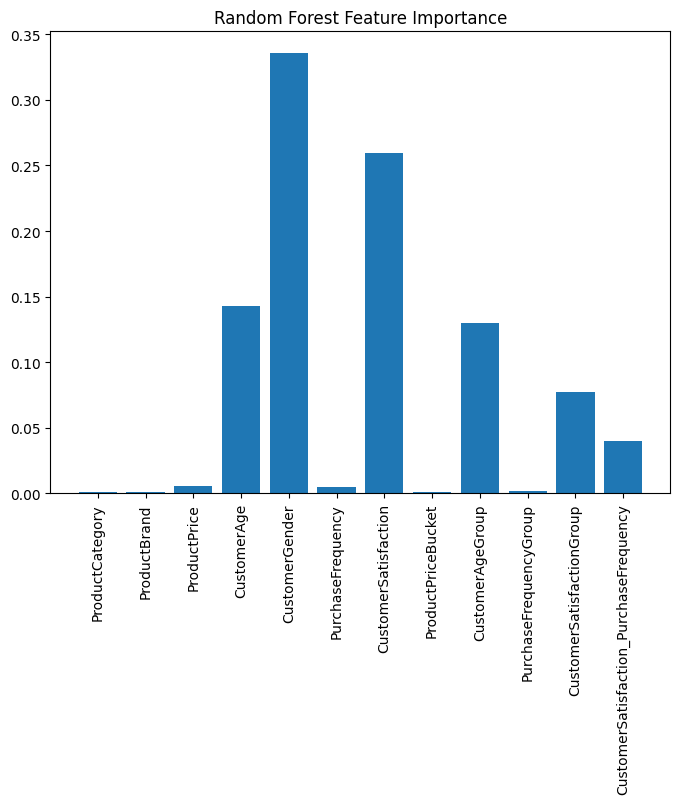

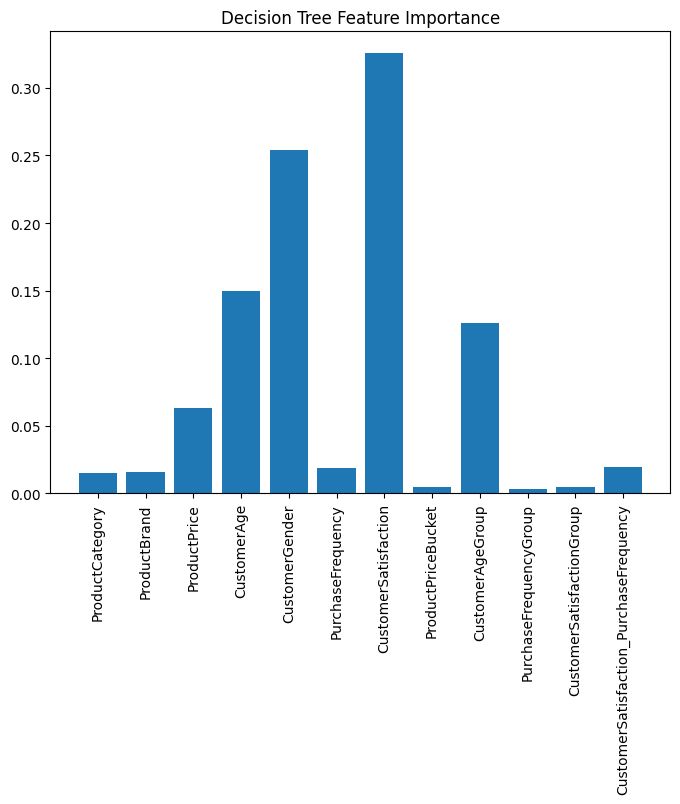

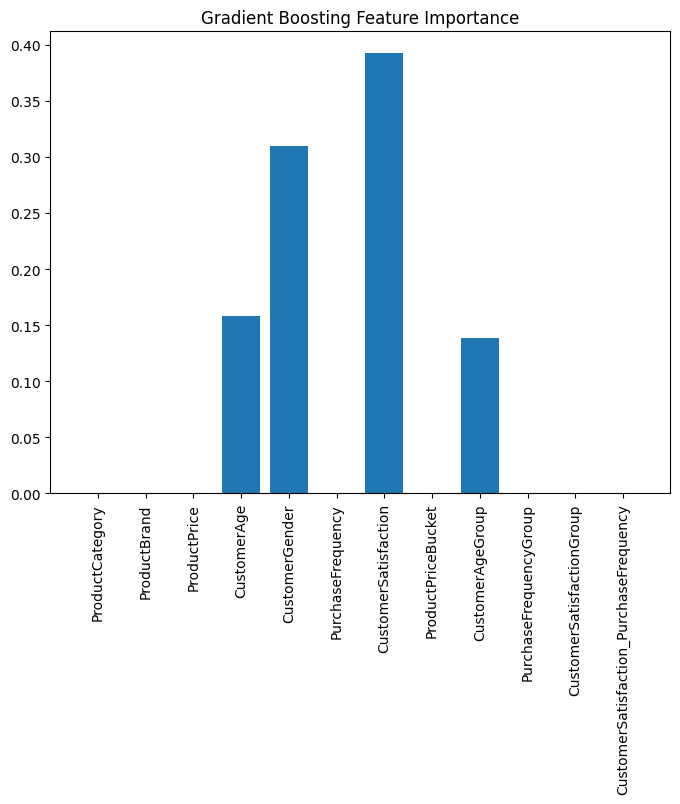

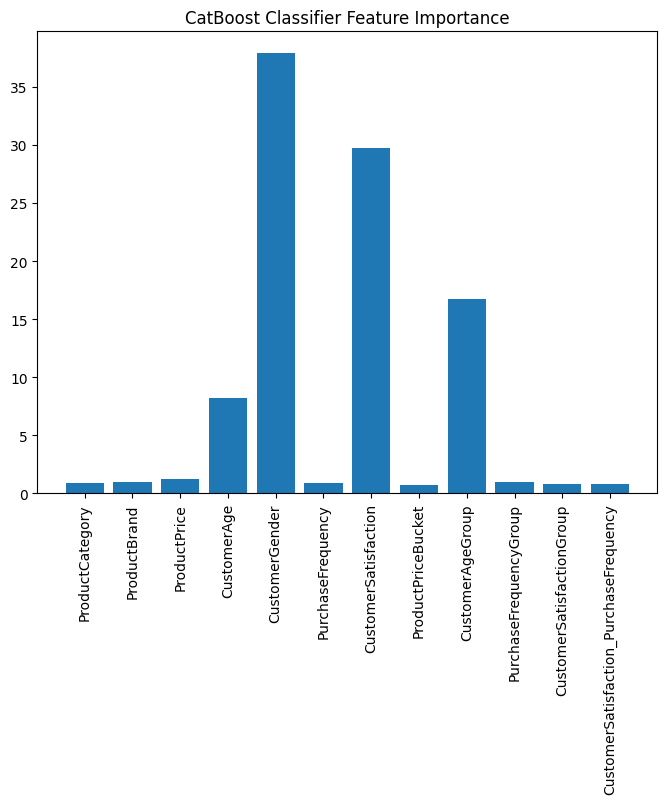

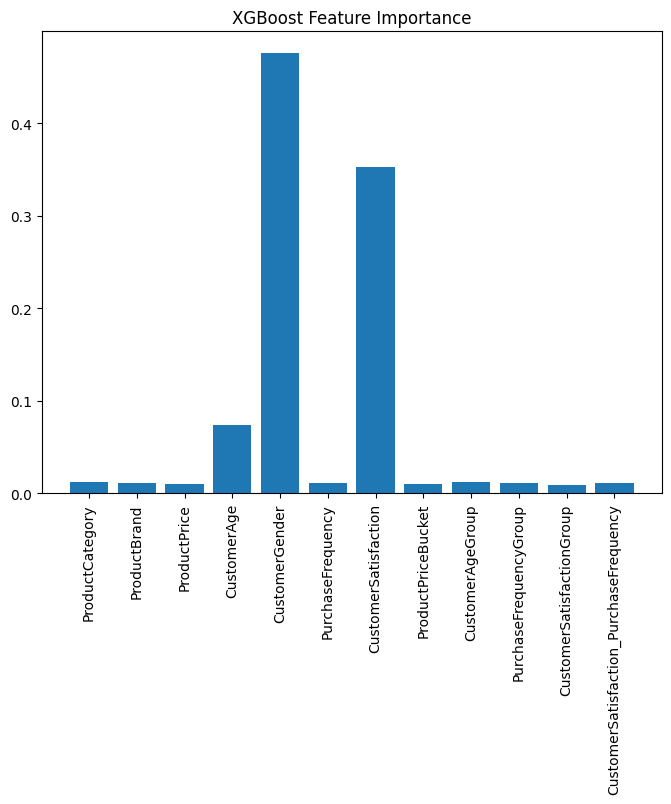

In [172]:
import matplotlib.pyplot as plt

for name, model in models.items():
    if hasattr(model,'feature_importances_'):
        feature_importances = model.feature_importances_
        plt.figure(figsize=(8,6))
        plt.bar(range(len(feature_importances)), feature_importances)
        plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
        plt.title(f'{name} Feature Importance')
        plt.show()

## SAVE THE BEST MODEL (PICKLE)

In [173]:
import pickle

In [174]:
# Save the best model

best_model = models[best_model_name]
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model,f)